# 플랫폼별 인플루언서 분포 및 성과 분석

In [1]:
import pandas as pd

df = pd.read_csv('influencer_master.csv')  # 또는 pd.read_excel 등`

# 플랫폼별 평균 계산
platform_summary = df.groupby('platform').agg({
    'follower_count': 'mean',
    'avg_engagement_rate': 'mean',
    'estimated_cost_per_post': 'mean',
    'genai_brand_fit_score': 'mean'
}).round(2)

print(platform_summary)

           follower_count  avg_engagement_rate  estimated_cost_per_post  \
platform                                                                  
Instagram       701694.34                 0.08               5891639.34   
TikTok          687693.80                 0.07               5238939.39   
YouTube         745874.29                 0.07               5053424.66   

           genai_brand_fit_score  
platform                          
Instagram                   3.10  
TikTok                      3.00  
YouTube                     2.89  


# 참여율과 팔로워 수/비용의 상관 분석

                         follower_count  avg_engagement_rate  \
follower_count                 1.000000            -0.062440   
avg_engagement_rate           -0.062440             1.000000   
estimated_cost_per_post       -0.096282            -0.041636   

                         estimated_cost_per_post  
follower_count                         -0.096282  
avg_engagement_rate                    -0.041636  
estimated_cost_per_post                 1.000000  


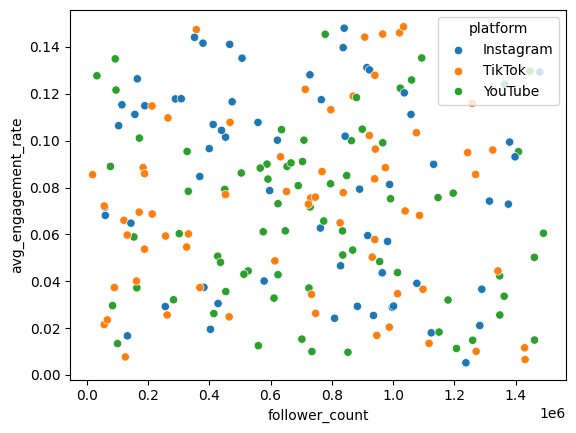

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('influencer_master.csv')

# 상관계수
correlation = df[['follower_count', 'avg_engagement_rate', 'estimated_cost_per_post']].corr()
print(correlation)

# 산점도 시각화
sns.scatterplot(x='follower_count', y='avg_engagement_rate', data=df, hue='platform')
plt.show()

# 브랜드 적합도 점수 분석 및 이유 분류

In [5]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud  # 필요 시 설치

df = pd.read_csv('influencer_master.csv')

# Score 분포
score_stats = df['genai_brand_fit_score'].describe()
print(score_stats)

# Reason 키워드 분석 (단순 split으로)
reasons = ' '.join(df['genai_brand_fit_reason'].dropna())
word_freq = Counter(reasons.split())
print(word_freq.most_common(10))

# 워드클라우드 (옵션)
wordcloud = WordCloud().generate(reasons)
wordcloud.to_file('reason_cloud.png')

count    200.000000
mean       2.991000
std        1.151542
min        1.000000
25%        2.100000
50%        2.900000
75%        4.100000
max        5.000000
Name: genai_brand_fit_score, dtype: float64
[('이미지.', 200), ('콘텐츠', 75), ('퀄리티', 75), ('우수.', 75), ('타겟', 71), ('부합.', 71), ('전문적인', 56), ('클린한', 55), ('최근', 54), ('평판', 54)]


# 카테고리별 비용 효율성 및 랭킹 분석

In [6]:
import pandas as pd

df = pd.read_csv('influencer_master.csv')

# 효율 지표 추가
df['efficiency'] = df['avg_engagement_rate'] / df['estimated_cost_per_post']

# 카테고리별 평균
category_summary = df.groupby('main_category')['efficiency'].mean().sort_values(ascending=False)
print(category_summary)

# Top 10 랭킹
top_influencers = df.sort_values('genai_brand_fit_score', ascending=False).head(10)[['inf_name', 'platform', 'genai_brand_fit_score']]
print(top_influencers)

main_category
여행        6.694054e-08
패션        5.289788e-08
라이프스타일    4.542074e-08
푸드        3.365276e-08
뷰티        2.607462e-08
Name: efficiency, dtype: float64
    inf_name   platform  genai_brand_fit_score
44       성예원     TikTok                    5.0
63       김예지  Instagram                    5.0
140      송지훈    YouTube                    5.0
119      박수빈  Instagram                    5.0
84       홍경자    YouTube                    4.9
106      이하은  Instagram                    4.9
40       장정식  Instagram                    4.9
169      이영숙     TikTok                    4.9
180      김경숙    YouTube                    4.9
156      남현우     TikTok                    4.9


# 전체 데이터 통합 분석

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('influencer_master.csv')

# 필터링 예시
filtered = df.query('platform == "Instagram" and main_category == "beauty" and genai_brand_fit_score > 70 and estimated_cost_per_post < 5000')
print(filtered)

# 회귀 분석 (score 예측)
X = df[['follower_count', 'avg_engagement_rate']]
y = df['genai_brand_fit_score']
model = LinearRegression().fit(X, y)
print(f"R-squared: {model.score(X, y)}")

Empty DataFrame
Columns: [inf_id, inf_name, platform, follower_count, avg_engagement_rate, main_category, estimated_cost_per_post, genai_brand_fit_score, genai_brand_fit_reason]
Index: []
R-squared: 0.018685854753905273


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 실제 데이터 로드 (dummy 대신 사용)
# df = pd.read_csv('influencer_data.csv')

# Dummy data 생성 예시 (생략 가능)
np.random.seed(42)
# ... (위 코드와 동일)

# 분석 코드 (필터링, 평균, 회귀)
# ... (위 코드와 동일)